<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/ISO_data_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster 1:
[array([10, 15])]
Centroid: [10. 15.]

Cluster 2:
[array([12, 15]), array([20, 40])]
Centroid: [16.  27.5]

Cluster 3:
[array([16, 19]), array([17, 45]), array([15, 14])]
Centroid: [16. 19.]



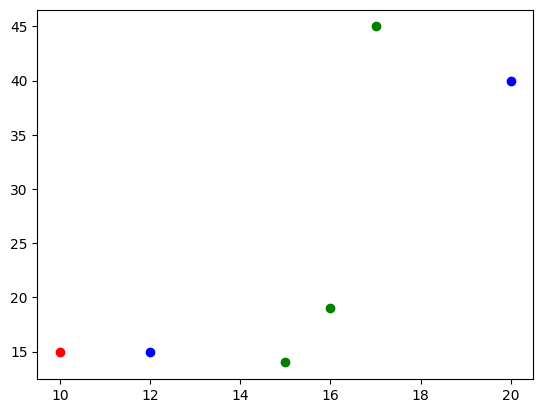

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def initialize_centroids(data, k):
    np.random.shuffle(data)
    return data[:k]
def assign_points(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        min_distance = min(distances)
        min_index = distances.index(min_distance)
        clusters[min_index].append(point)
    return clusters
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        centroid = np.median(cluster, axis=0)
        new_centroids.append(centroid)
    return new_centroids
def split_clusters(clusters, centroids, max_cluster_size):
    new_clusters = []
    new_centroids = []
    for i, cluster in enumerate(clusters):
        if len(cluster) > max_cluster_size:
            cluster1 = cluster[:len(cluster)//2]
            cluster2 = cluster[len(cluster)//2:]
            centroid1 = np.median(cluster1, axis=0)
            centroid2 = np.median(cluster2, axis=0)
            new_clusters.extend([cluster1, cluster2])
            new_centroids.extend([centroid1, centroid2])
        else:
            new_clusters.append(cluster)
            new_centroids.append(centroids[i])
    return new_clusters, new_centroids

def merge_clusters(clusters, centroids, min_cluster_size):
    new_clusters = []
    new_centroids = []
    for i, cluster in enumerate(clusters):
        if len(cluster) < min_cluster_size:
            closest_cluster = min(centroids, key=lambda c: np.linalg.norm(c - centroids[i]))
            closest_cluster_index = centroids.index(closest_cluster)
            merged_cluster = cluster + clusters[closest_cluster_index]
            centroid = np.median(merged_cluster, axis=0)
            new_clusters.append(merged_cluster)
            new_centroids.append(centroid)
        else:
            new_clusters.append(cluster)
            new_centroids.append(centroids[i])
    return new_clusters, new_centroids

def isodata_clustering(data, k, max_iterations, initial_cluster_size, max_cluster_size, min_cluster_size, convergence_threshold):
    centroids = initialize_centroids(data, k)
    clusters = assign_points(data, centroids)
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        new_centroids = update_centroids(clusters)
        clusters, centroids = split_clusters(clusters, new_centroids, max_cluster_size)
        clusters, centroids = merge_clusters(clusters, centroids, min_cluster_size)
        if np.max([np.linalg.norm(centroids[i] - new_centroids[i]) for i in range(k)]) < convergence_threshold:
            break
    return clusters, centroids
# Example usage
x = [10, 15, 16, 12, 17, 20]
y = [15, 14, 19, 15, 45, 40]
data = np.array(list(zip(x, y)))
k = 2
max_iterations = 10
initial_cluster_size = 5
max_cluster_size = 3
min_cluster_size = 1
convergence_threshold = 0.001
clusters, centroids = isodata_clustering(data, k, max_iterations, initial_cluster_size, max_cluster_size, min_cluster_size, convergence_threshold)
# Print clusters and centroids
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    print(cluster)
    print("Centroid:", centroids[i])
    print()
# Plot the clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']
for i, cluster in enumerate(clusters):
    plt.scatter([point[0] for point in cluster], [point[1] for point in cluster], color=colors[i])
plt.show()
